In [64]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Model instantiating
from sklearn.ensemble import RandomForestClassifier

# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [45]:
training_dataset = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'
df = pd.read_csv(training_dataset,names=['IdNo','Refractive index','Sodium','Magnesium','Aluminum',
                                         'Silicon','Potassium','Calcium','Barium','Iron','Type of glass'],index_col=None)

In [46]:
df.head()

,IdNo,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [1]:
"""
EDA

1.Rows in dataset: 214
  Columns in dataset: 11
  
2. Null values present: 0

3. Dataset has 2 int64 dtype columns including label: ie type of glass.
   Rest 9 are float type representing Ri and other mineral contents in glass sample.
   
4. Descriptive statistics: 
    214 row entries are present in each column which confirm no null values.
    Refractive Index values range from 1.51 to 1.53.
    Since values are smaller , standard deviation of all columns are 1.5 that is very less.
    All values seem to be ok but we will cross check using data distribution.
    
5. No duplicate values are present in dataset.

6. For different glass types, their value counts in dataset can be noted as:

                  Type  Values
                    2     76
                    1     70
                    7     29
                    3     17
                    5     13
                    6      9
                    
    1 and 2 glass types have balanced values , but for glass types 7,3,5 and 6, values are imbalanced.
    
7.  Pair plot denotes that majorly all values are randomly scattered and do not confirm 
    any strong positive relation between variables.
    Some slight positive slope can be seen between pairs aluminium, idno : aluminium , sodium : magnesium.

    But still we cant conclude anything yet lets plot heatmap and also check corelation of each feature with 
    label to get suggestions. 

8.  Most correlated features are magnesium and type of glass , idno.

9.  Corrwith() function shows good correlation between idno, magnesium, aluminium and barium with type of glass.
        
10.    Using skewwness function we got a clear picture that:

        Barium              3.188587
        Iron                1.486479
        Type of glass       1.284007
        Calcium             1.077962
        Magnesium          -1.528849

are highly skewed.
   
11. We have used RandomForestClassifier to predict the type of glass and we have got 100% accuracy for both and training 
    and testing data. We have also used hyper parameter tuning for RandomForestClassifier and also tried other algos,
    but we can conlude that best algo for predicting the type of glass is RandomForestClassifier itself.

"""

'\nEDA\n\n1.Rows in dataset: 214\n  Columns in dataset: 11\n  \n2. Null values present: 0\n\n3. Dataset has 2 int64 dtype columns including label: ie type of glass.\n   Rest 9 are float type representing Ri and other mineral contents in glass sample.\n   \n4. Descriptive statistics: \n    214 row entries are present in each column which confirm no null values.\n    Refractive Index values range from 1.51 to 1.53.\n    Since values are smaller , standard deviation of all columns are 1.5 that is very less.\n    All values seem to be ok but we will cross check using data distribution.\n    \n5. No duplicate values are present in dataset.\n\n6. For different glass types, their value counts in dataset can be noted as:\n\n                  Type  Values\n                    2     76\n                    1     70\n                    7     29\n                    3     17\n                    5     13\n                    6      9\n                    \n    1 and 2 glass types have balanced va

In [47]:
df.shape

(214, 11)

In [48]:
df.isnull().sum()

IdNo                0
Refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IdNo              214 non-null    int64  
 1   Refractive index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type of glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [50]:
df.describe()

,IdNo,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [51]:
# Lets check for duplicated values:

print(df[df.duplicated(keep=False)])

# drop duplicated values
df.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [IdNo, Refractive index, Sodium, Magnesium, Aluminum, Silicon, Potassium, Calcium, Barium, Iron, Type of glass]
Index: []


In [52]:
df.shape

(214, 11)

In [53]:
# Checking if imbalanced dataset:

print(df['Type of glass'].value_counts(),'\n\n')

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64 




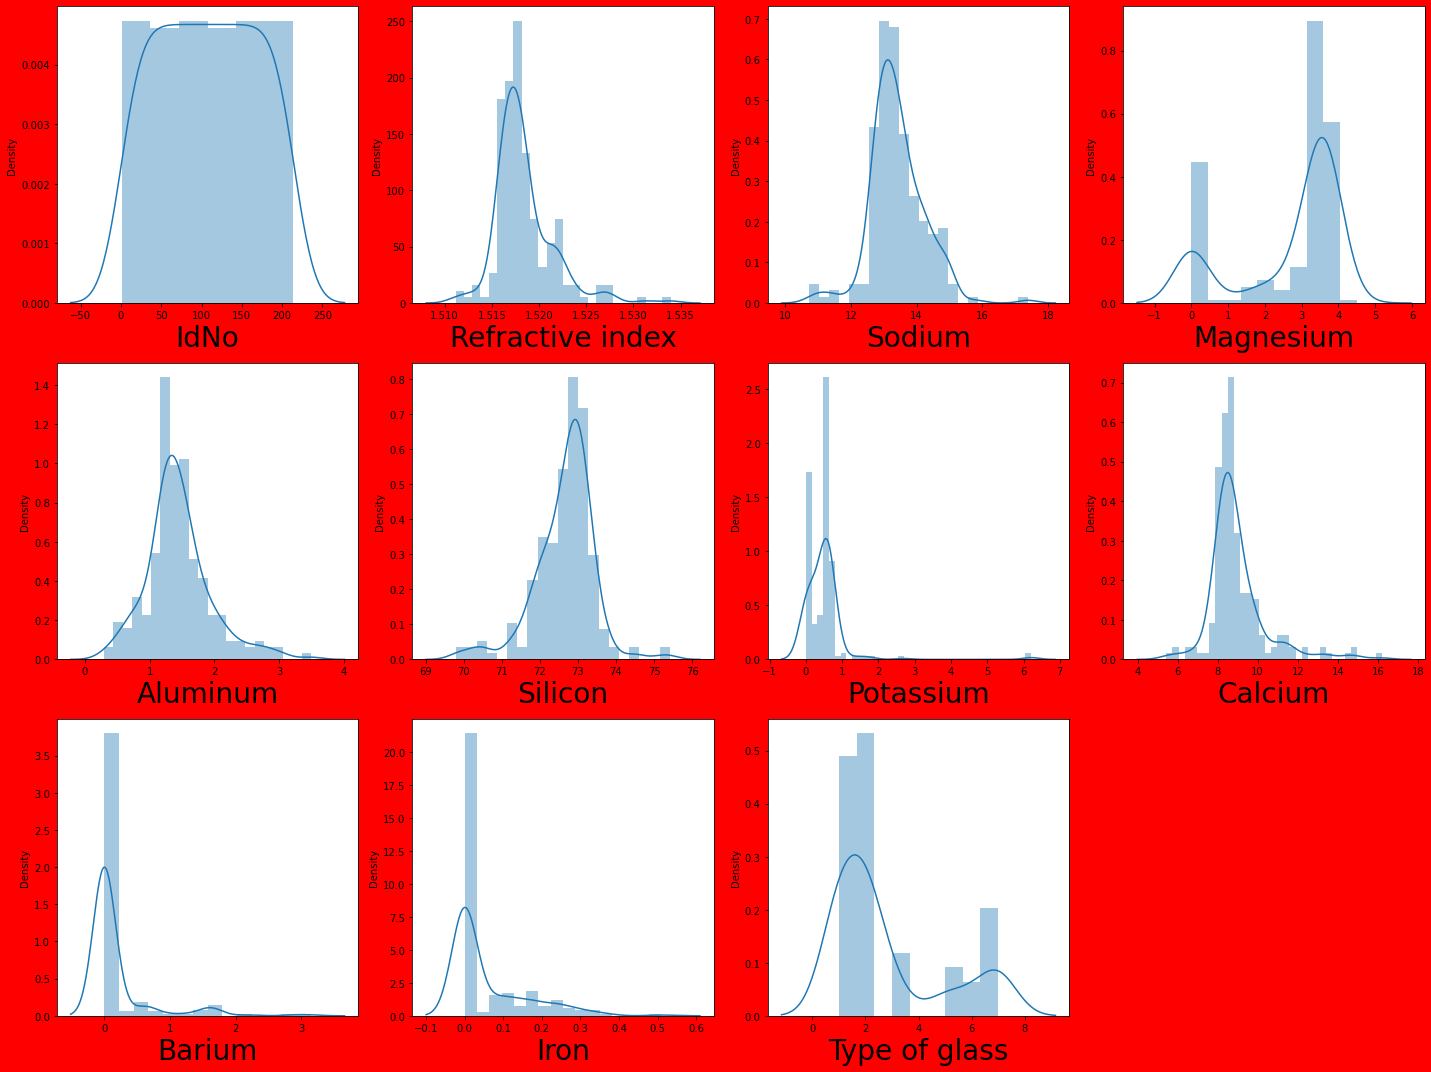

In [54]:
# Plotting distribution plot to check data distribution.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1

for col in df.columns:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 28)
        
    plotnumber +=1
plt.tight_layout() # plt.show() can be used

In [ ]:
By checking data distribution, Graphes of idno , aluminium and magnesium seems normaly distributed.
Rest features are skewed and might also contain outliers. 
Later we will remove outliers and perform data normalization steps.

Using score we have removed outliers in the dataset and we are left with 194 values as of now.

Now data distribution looks ok but barium and iron are still heavely skewed.



In [55]:
# Using Z Statistics to check and remove any more outliers:

from scipy.stats import zscore

z_score = zscore(df[df.columns])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1) # values lying in 3 times std will be removed

df = df[filtering_entry]

df.describe()

,IdNo,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,102.221649,1.518062,13.416959,2.880000,1.422732,72.720619,0.431546,8.824639,0.123351,0.051598,2.618557
std,61.530795,0.002288,0.673292,1.308715,0.443786,0.584852,0.282287,0.989154,0.357125,0.085782,2.030561
min,1.000000,1.511310,11.030000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.250000,1.516513,12.945000,2.855000,1.190000,72.372500,0.132500,8.240000,0.000000,0.000000,1.000000
50%,97.500000,1.517635,13.305000,3.500000,1.360000,72.820000,0.555000,8.585000,0.000000,0.000000,2.000000
75%,153.750000,1.518995,13.787500,3.610000,1.602500,73.087500,0.600000,9.077500,0.000000,0.090000,3.000000
max,213.000000,1.527250,15.150000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


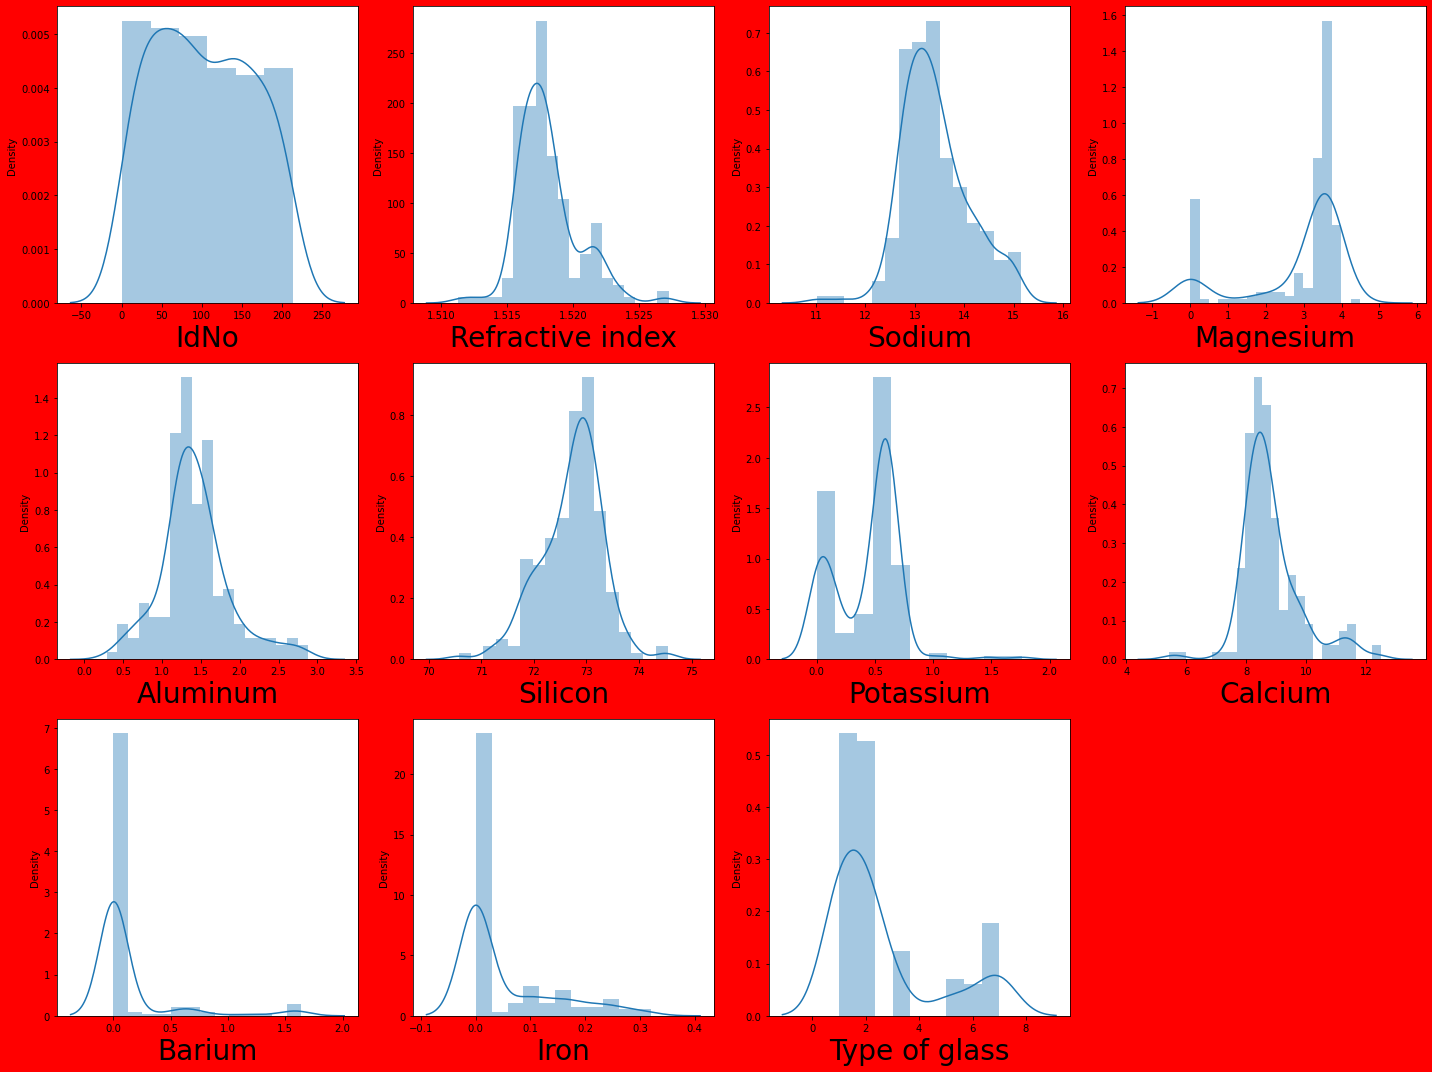

In [75]:
# Plotting distribution plot to check data distribution.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1

for col in df.columns:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 28)
        
    plotnumber +=1
plt.tight_layout() # plt.show() can be used

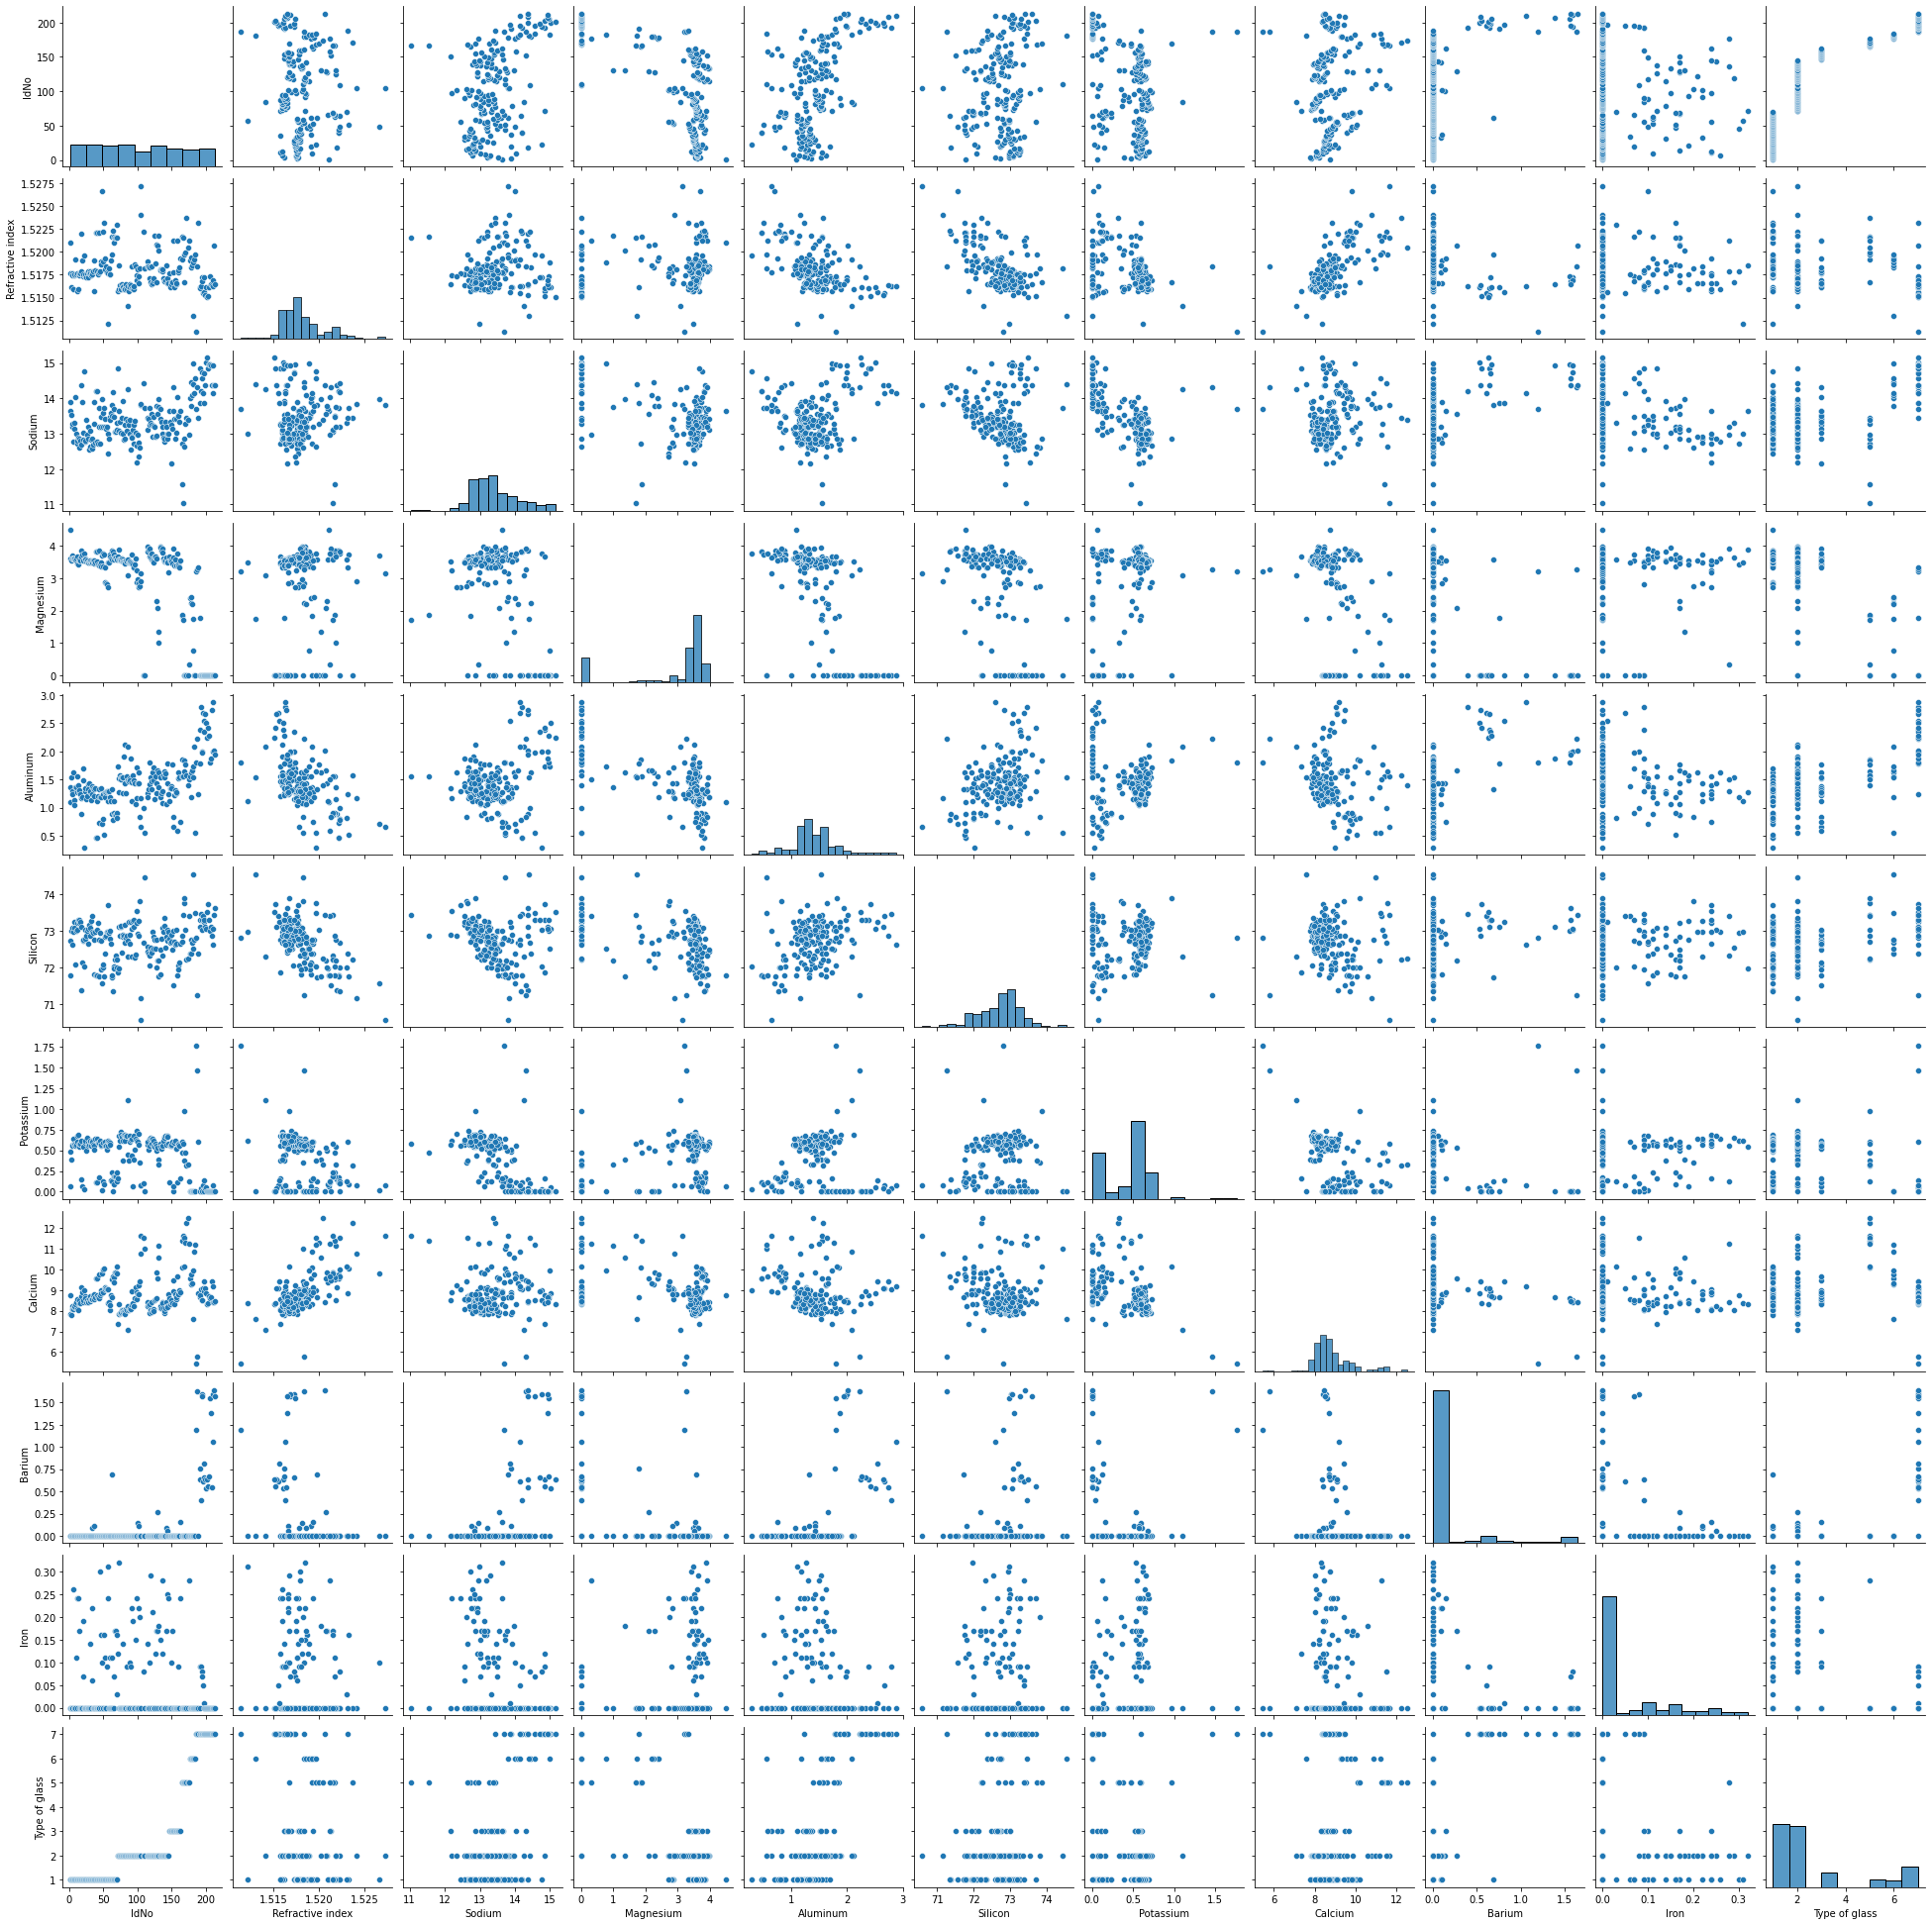

In [56]:
sns.pairplot(df)

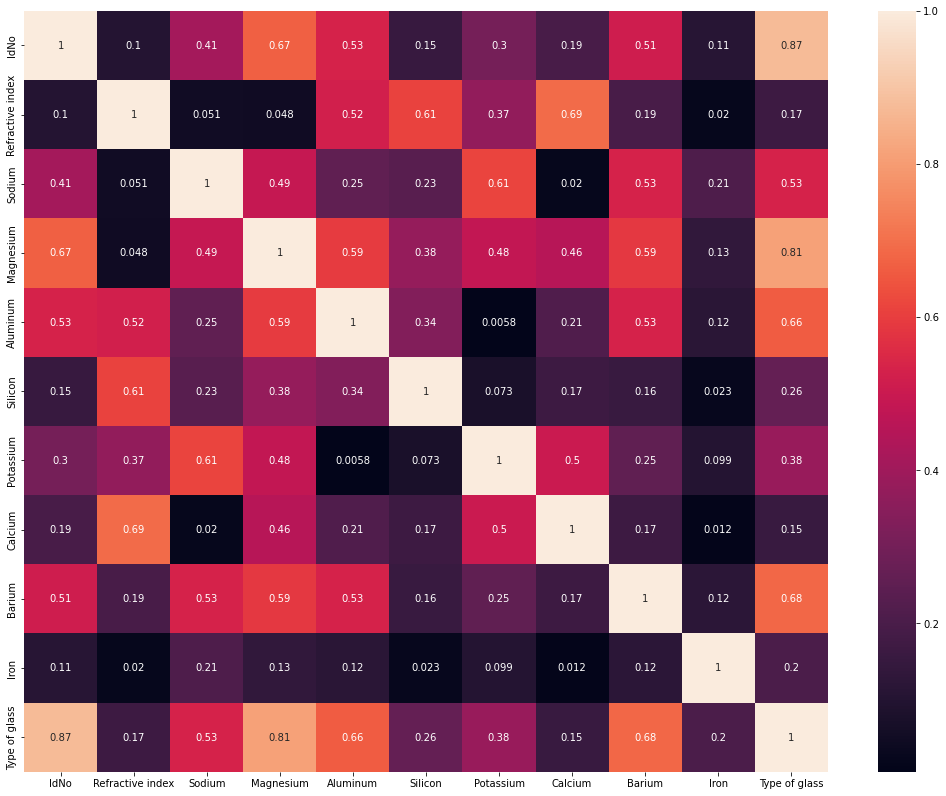

In [57]:
df_corr = df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

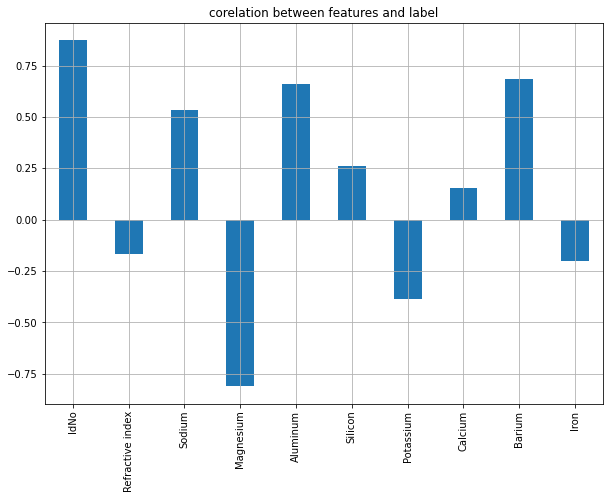

In [58]:
# Correlation between features and label:

df.drop(columns = 'Type of glass',axis = 1).corrwith(df['Type of glass']).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and label')
plt.show()

In [59]:
# Checking skewness
df.skew().sort_values(ascending=False)

Barium              3.188587
Iron                1.486479
Type of glass       1.284007
Calcium             1.077962
Refractive index    0.952733
Aluminum            0.658259
Sodium              0.371482
Potassium           0.303175
IdNo                0.107537
Silicon            -0.425450
Magnesium          -1.528849
dtype: float64

In [60]:
y = df['Type of glass']
X = df.drop(columns = ['Type of glass'])

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [62]:
# Splitting our data to training data and testing data
# x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = train_test_split(X_standard,y,test_size=0.20,random_state=348)

# Here we are keeping training data as our scalled data and testing data as our label or target.

In [63]:
# Defining function for model confidence and accuracy:

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train == True:
        y_pred = clf.predict(x_train)
        print('Train result: ',round(accuracy_score(y_train,y_pred)*100,3),'Percent')
    elif train == False:
        pred = clf.predict(x_test)
        print('Test result: ',round(accuracy_score(y_test,pred)*100,3),'Percent')
        
        print('\n\n Test Classification report: \n\n',classification_report(y_test,pred,digits=2)) ##Model confidence/accuracy


In [65]:
random_clf = RandomForestClassifier()

random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
# Calling metrics function and pass dataset to check train and test score:

metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)

Train result:  100.0 Percent
Test result:  100.0 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [67]:
# Tuning parameters using GridSearchCV:

params = {'n_estimators':[13,15],
          'criterion':['gini','entropy'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]}

grd = GridSearchCV(random_clf,param_grid=params)

grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [68]:
# Getting best parameters:

print('Best parameters: ',grd.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [71]:
# Reinstantiating:

random_clf = RandomForestClassifier(n_estimators=15,criterion='entropy',max_depth=15,
                                    min_samples_split=11,min_samples_leaf=5)
                                    
grd.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=15)

In [72]:
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=15)

In [73]:
# Calling metrics function and pass dataset to check train and test score:

metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)

Train result:  99.355 Percent
Test result:  100.0 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

